## Visualization of FunGen-xQTL AD Loci Table
#### Author: Alexandre Pelletier and Jenny Empawi

### Motivation
Create an information visualization summarizing key information from the comprehensive AD loci table.

### Implementation
Generate one figure to highlight the most critical insights from the AD loci table. Possible information to include: effect size direction for AD risk variants wrt xQTL

In [9]:
out<-'/restricted/projectnb/xqtl/jaempawi/xqtl/Figure_6'  #FIXME
source('/restricted/projectnb/xqtl/jaempawi/xqtl/Figure_6/gene_prio_utils.R') #FIXME

### Load result

In [10]:
#update table figure
res_adx<-fread(fp(out,'res_allanalysis_ADloci_overlap.csv.gz')) #FIXME

#add the confidence level
res_adxub<-fread(fp(out,'res_AD_variants_xQTL.csv.gz'))  #FIXME
res_adxub[,top_confidence:=str_extract(xQTL_effects,'C[0-9]')]

res_adx<-merge(res_adx,unique(res_adxub[order(locus_index,gene_name,confidence_lvl),.(gene_name,locus_index,context_short,confidence_lvl,top_confidence)]),all.x = T,allow.cartesian = TRUE)

#xQTL evidence summary dot plot at locus level
#for each QTL evidence type put in 3 cat : absent, present, high, 
#for fp: high if cs95, coloc : high if npc > 0.95, TWAS: MR
table(res_adx$Method)
table(res_adx$context_short)

#group contexts better: 
res_adx[Method%in%'TWAS/MR',evidence_type:='twas']
res_adx[str_detect(Method,'finemapping')&Method!='AD_GWAS_finemapping',evidence_type:='finemapping']
res_adx[str_detect(str_to_lower(Method),'coloc'),evidence_type:='coloc']



       AD_GWAS_finemapping     AD_meta_colocalization 
                      6552                       7825 
    AD_xQTL_colocalization           APOE interaction 
                    331652                       2662 
                     Coloc                         QR 
                     43665                     652037 
                   TWAS/MR                      cTWAS 
                      4610                        203 
        fSuSiE_finemapping           msex interaction 
                     37369                         12 
 multi_context_finemapping     multi_gene_finemapping 
                    236609                     123761 
single_context_finemapping                    sn_sQTL 
                   2877444                     227297 
         trans_finemapping 
                    173687 


              Ast caQTL    Ast eQTL    Ast sQTL           B    Exc eQTL 
      38008           7      136446       12744       10551      165828 
   Exc sQTL    Inh eQTL    Inh sQTL           J           K   Mic caQTL 
     162545      178391       24492         672        1118          12 
   Mic eQTL    Mic sQTL    OPC eQTL    OPC sQTL    Oli eQTL    Oli sQTL 
      65779           2       97801        8720      156945       18794 
          W   bMac eQTL   bMic eQTL  bMono eQTL   bulk eQTL  bulk gpQTL 
      40897       64755       49788       33898     2864062       16773 
 bulk haQTL   bulk mQTL bulk p-sQTL   bulk pQTL   bulk sQTL bulk u-sQTL 
        657       42350      190813       29143      267940       45454 

### Assign evidence levels for each evidence type

In [11]:
#res_adx[,evidence_level:=NULL]
res_adx[evidence_type=='twas',evidence_level:=ifelse(any(MR_signif),2,1),by=.(ADlocus,gene_ID,context_short)]
res_adx[evidence_type=='finemapping',evidence_level:=ifelse(any(susie_coverage=='cs95'),2,1),by=.(ADlocus,gene_ID,context_short)]
res_adx[evidence_type=='coloc',evidence_level:=ifelse(any(cos_npc>0.95)|any(L_PP.H4.abf>0.95),2,1),by=.(ADlocus,gene_ID,context_short)]

res_adx[,locus_gene:=paste(locus_index,ifelse(gene_name=='','?',gene_name),sep='_')]
res_adx[order(locus_gene,cV2F_rank),locus_gene_variant:=paste(locus_gene,variant_ID[1],sep='_'),by='locus_gene']

res_adx[,n.study:=length(unique(context[evidence_level>0])),
            by=c('context_short','locus_gene','evidence_type')]


### Filter for genome-wide significant hits and top genes per locus

In [13]:
res_adx[, genomewide_sig_loc := any(min_pval < 5e-8), by = 'locus_gene']
res_adx[context_short=='Ast caQTL']
res_adxloc <- unique(res_adx[!context_short %in% c('B','J','K','W')][!is.na(evidence_type)][order(locus_gene, cV2F_rank)], by = c('context', 'locus_gene', 'evidence_type'))
#count numnber of dataset per broad context
res_adxloc[,n.study:=length(unique(context[evidence_level>0])),by=c('context_short','locus_gene','evidence_type')]

locus_index,context_short,gene_name,gene_ID,context,variant_ID,#chr,start,end,a1,⋯,context_broad2,qtl_type,confidence_lvl,top_confidence,evidence_type,evidence_level,locus_gene,locus_gene_variant,n.study,genomewide_sig_loc
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<lgl>
196,Ast caQTL,APP,ENSG00000142192,ROSMAP_snATAC_Kelis_Ast,chr21:26171790:A:G,chr21,26171789,26171790,,⋯,Ast,caQTL,NA,NA,finemapping,2,196_APP,196_APP_chr21:26121885:C:T,1,TRUE
196,Ast caQTL,APP,ENSG00000142192,ROSMAP_snATAC_Kelis_Ast,chr21:26171790:A:G,chr21,26171789,26171790,,⋯,Ast,caQTL,NA,NA,finemapping,2,196_APP,196_APP_chr21:26121885:C:T,1,TRUE
196,Ast caQTL,APP,ENSG00000142192,ROSMAP_snATAC_Kelis_Ast,chr21:26171790:A:G,21,NA,NA,,⋯,Ast,caQTL,NA,NA,coloc,NA,196_APP,196_APP_chr21:26121885:C:T,1,TRUE
196,Ast caQTL,APP,ENSG00000142192,ROSMAP_snATAC_Kelis_Ast,chr21:26171790:A:G,21,NA,NA,,⋯,Ast,caQTL,NA,NA,coloc,NA,196_APP,196_APP_chr21:26121885:C:T,1,TRUE
196,Ast caQTL,APP,ENSG00000142192,ROSMAP_snATAC_Kelis_Ast,chr21:26171790:A:G,21,NA,NA,,⋯,Ast,caQTL,NA,NA,coloc,NA,196_APP,196_APP_chr21:26121885:C:T,1,TRUE
196,Ast caQTL,APP,ENSG00000142192,ROSMAP_snATAC_Kelis_Ast,chr21:26171790:A:G,21,NA,NA,,⋯,Ast,caQTL,NA,NA,coloc,NA,196_APP,196_APP_chr21:26121885:C:T,1,TRUE
196,Ast caQTL,APP,ENSG00000142192,ROSMAP_snATAC_Kelis_Ast,chr21:26171790:A:G,21,NA,NA,,⋯,Ast,caQTL,NA,NA,coloc,NA,196_APP,196_APP_chr21:26121885:C:T,1,TRUE


### Genome-wide significance hits

In [14]:
seqid<-function(x,only_num=FALSE){
  if(only_num){
    str_extract(x,'[0-9]+')|>as.numeric()
  }else{
    sapply(x,function(x)strsplit(x,"\\.|-|:|_|,|\\[|\\]")[[1]][1])
    
  }
}
           
res_adxlocf<-res_adxloc[(genomewide_sig_loc)][evidence_level>0]
unique(res_adxlocf$locus_gene_variant)#622
unique(res_adxlocf$locus_index)|>length() #94

#take top gene per locus
#based on the confidence level

#top gene: based on confidence level and then number of studies/dataset
res_adxlocf[gene_name!='',n.study.gene:=length(unique(context[evidence_level>0])),by=.(gene_name,locus_index)]

res_adxlocf[gene_name!='',top_gene:=gene_name==gene_name[order(top_confidence,-n.study.gene)][1],by=.(locus_index)]



res_adxlocfge<-res_adxlocf[context_short!=''][order(locus_index,-cV2F_rank)][(top_gene)]
unique(res_adxlocfge$locus_index)|>length() #94
unique(res_adxlocfge$gene_name)|>length()#82

#plot the total confidence score per method
res_adxlocfge[gene_name!='',tot.evidence_level:=sum(evidence_level,na.rm = TRUE),by=.(locus_index,gene_name,evidence_type,context_short)]


res_adxlocfge[,chr:=seqid(variant_ID[!is.na(variant_ID)][1],only_num = T),by=.(locus_index)]
res_adxlocfge[is.na(chr),chr:=`#chr`]
res_adxlocfge[is.na(chr)]|>nrow()

res_adxlocfge[,locus_gene:=factor(locus_gene,levels = unique(locus_gene[order(locus_index,confidence_lvl,-n.study.gene)]))]

unique(res_adxlocfge$context_short)
contexts_order<-c('Exc eQTL','Inh eQTL','Oli eQTL','OPC eQTL','Ast eQTL','Ast caQTL','Mic eQTL','bMic eQTL','bMac eQTL','bMono eQTL','bulk eQTL',
                  'bulk p-sQTL','bulk u-sQTL','bulk a-sQTL',
                  'bulk pQTL','bulk gpQTL','bulk mQTL','bulk haQTL')

res_adxlocfge[context_short=='bulk sQTL',context_short:='bulk a-sQTL']


res_adxlocfge[,context_short:=factor(context_short,levels = c(contexts_order))]

[1] "100_EED_chr11:86139201:C:T"            
  [2] "100_LINC01054_chr11:86139201:C:T"      
  [3] "100_PICALM_chr11:86146597:T:C"         
  [4] "102_ARHGEF12_chr11:121480287:A:G"      
  [5] "103_GFPT1_chr11:121522741:G:A"         
  [6] "104_SORL1_chr11:121564878:T:C"         
  [7] "112_AL031687.1_chr14:92465707:A:G"     
  [8] "112_BCAT1_chr14:92465639:G:A"          
  [9] "112_C4orf46_chr14:92470683:C:T"        
 [10] "112_Metazoa_SRP_chr14:92465707:A:G"    
 [11] "112_RBM19_chr14:92465639:G:A"          
 [12] "112_RIN3_chr14:92465707:A:G"           
 [13] "112_SLC24A4_chr14:92465707:A:G"        
 [14] "113_AL035409.1_chr14:92472511:G:A"     
 [15] "113_LAPTM4A_chr14:92472511:G:A"        
 [16] "113_MND1_chr14:92472511:G:A"           
 [17] "113_RIN3_chr14:92472511:G:A"           
 [18] "113_RYR3_chr14:92472511:G:A"           
 [19] "113_SLC24A4_chr14:92472511:G:A"        
 [20] "116_AC103796.1_chr14:52913160:G:A"     
 [21] "116_AC139451.1_chr14:52913160:G:A"     
 [22] "116_H4-16_chr14:52866898:C:A"          
 [23] "116_ITGAV_chr14:52846687:T:C"          
 [24] "116_RPL35AP9_chr14:52866898:C:A"       
 [25] "117_ADAM10_chr15:58768943:A:G"         
 [26] "117_MINDY2_chr15:58768943:A:G"         
 [27] "117_PRAL_chr15:58690191:T:C"           
 [28] "117_REL_chr15:58768943:A:G"            
 [29] "118_OGFOD1_chr15:49901356:G:A"         
 [30] "119_APH1B_chr15:63277703:C:T"          
 [31] "119_COL12A1_chr15:63277703:C:T"        
 [32] "119_LINC00381_chr15:63277703:C:T"      
 [33] "119_STOX2_chr15:63277703:C:T"          
 [34] "119_TRIM53AP_chr15:63277703:C:T"       
 [35] "11_NCK2_chr2:105749599:T:C"            
 [36] "127_ALG5_chr16:79538543:T:C"           
 [37] "129_CALM3_chr16:81740211:A:T"          
 [38] "129_CDK12_chr16:81739662:A:G"          
 [39] "129_COL27A1_chr16:81740211:A:T"        
 [40] "129_DENND6B_chr16:81739662:A:G"        
 [41] "129_ZFPM2_chr16:81739662:A:G"          
 [42] "132_AC006254.1_chr16:81937798:T:C"     
 [43] "132_AC008840.1_chr16:81937798:T:C"     
 [44] "132_DOCK3_chr16:81946414:T:C"          
 [45] "132_EXOC3_chr16:81946414:T:C"          
 [46] "132_SEC24B_chr16:81937798:T:C"         
 [47] "133_COL6A1_chr16:90103687:G:A"         
 [48] "134_AC011944.2_chr16:30004244:C:T"     
 [49] "134_AC023866.2_chr16:29954956:G:C"     
 [50] "134_AC093512.2_chr16:29983601:C:T"     
 [51] "134_AC113349.2_chr16:30011243:A:G"     
 [52] "134_ARHGEF1_chr16:30045827:C:T"        
 [53] "134_ASPHD1_chr16:29983601:C:T"         
 [54] "134_BCKDK_chr16:30010081:C:T"          
 [55] "134_CCDC30_chr16:29977620:A:G"         
 [56] "134_DOC2A_chr16:29983601:C:T"          
 [57] "134_GDPD3_chr16:30018227:C:T"          
 [58] "134_INO80E_chr16:29983601:C:T"         
 [59] "134_ITGAM_chr16:30023148:T:G"          
 [60] "134_KCTD13_chr16:29983601:C:T"         
 [61] "134_LMF2_chr16:30012465:C:G"           
 [62] "134_MAPK3_chr16:29983601:C:T"          
 [63] "134_MTUS2_chr16:30018227:C:T"          
 [64] "134_PPP4C_chr16:30011243:A:G"          
 [65] "134_PRSS8_chr16:30023148:T:G"          
 [66] "134_RPL28_chr16:30011243:A:G"          
 [67] "134_SEPHS2_chr16:29954956:G:C"         
 [68] "134_SETD1A_chr16:30004244:C:T"         
 [69] "134_SEZ6L2_chr16:29983601:C:T"         
 [70] "134_TAOK2_chr16:29954956:G:C"          
 [71] "134_TLCD3B_chr16:30018227:C:T"         
 [72] "134_TMEM219_chr16:29983601:C:T"        
 [73] "134_USF2_chr16:30011243:A:G"           
 [74] "134_YPEL3_chr16:29983601:C:T"          
 [75] "134_ZNF432_chr16:30096460:A:G"         
 [76] "134_ZNF689_chr16:30037232:C:T"         
 [77] "134_ZNF747_chr16:29977620:A:G"         
 [78] "137_BCKDK_chr16:31144137:C:T"          
 [79] "137_BCL7C_chr16:31144137:C:T"          
 [80] "137_BRD4_chr16:31144137:C:T"           
 [81] "137_C5orf17_chr16:31144137:C:T"        
 [82] "137_CCDC189_chr16:31144137:C:T"        
 [83] "137_KAT8_chr16:31144137:C:T"           
 [84] "137_PRSS36_chr16:31144137:C:T"         
 [85] "137_PRSS8_chr16:31144137:C:T"          
 [86] "

[1] 92

[1] 92

[1] 78

Warning message in `[.data.table`(res_adxlocfge, is.na(chr), `:=`(chr, `#chr`)):
“Coercing 'character' RHS to 'integer' to match the type of column 154 named 'chr'.”


[1] 0

[1] "bulk eQTL"   "Oli eQTL"    "bulk haQTL"  "Mic eQTL"    "bMono eQTL" 
 [6] "bulk pQTL"   "Ast eQTL"    "Exc eQTL"    "Inh eQTL"    "OPC eQTL"   
[11] "bulk p-sQTL" "bMac eQTL"   "bulk mQTL"   "bulk gpQTL"  "bulk u-sQTL"
[16] "bMic eQTL"   "bulk sQTL"   "Ast caQTL"

### Visualization

#### Total confidence score per method

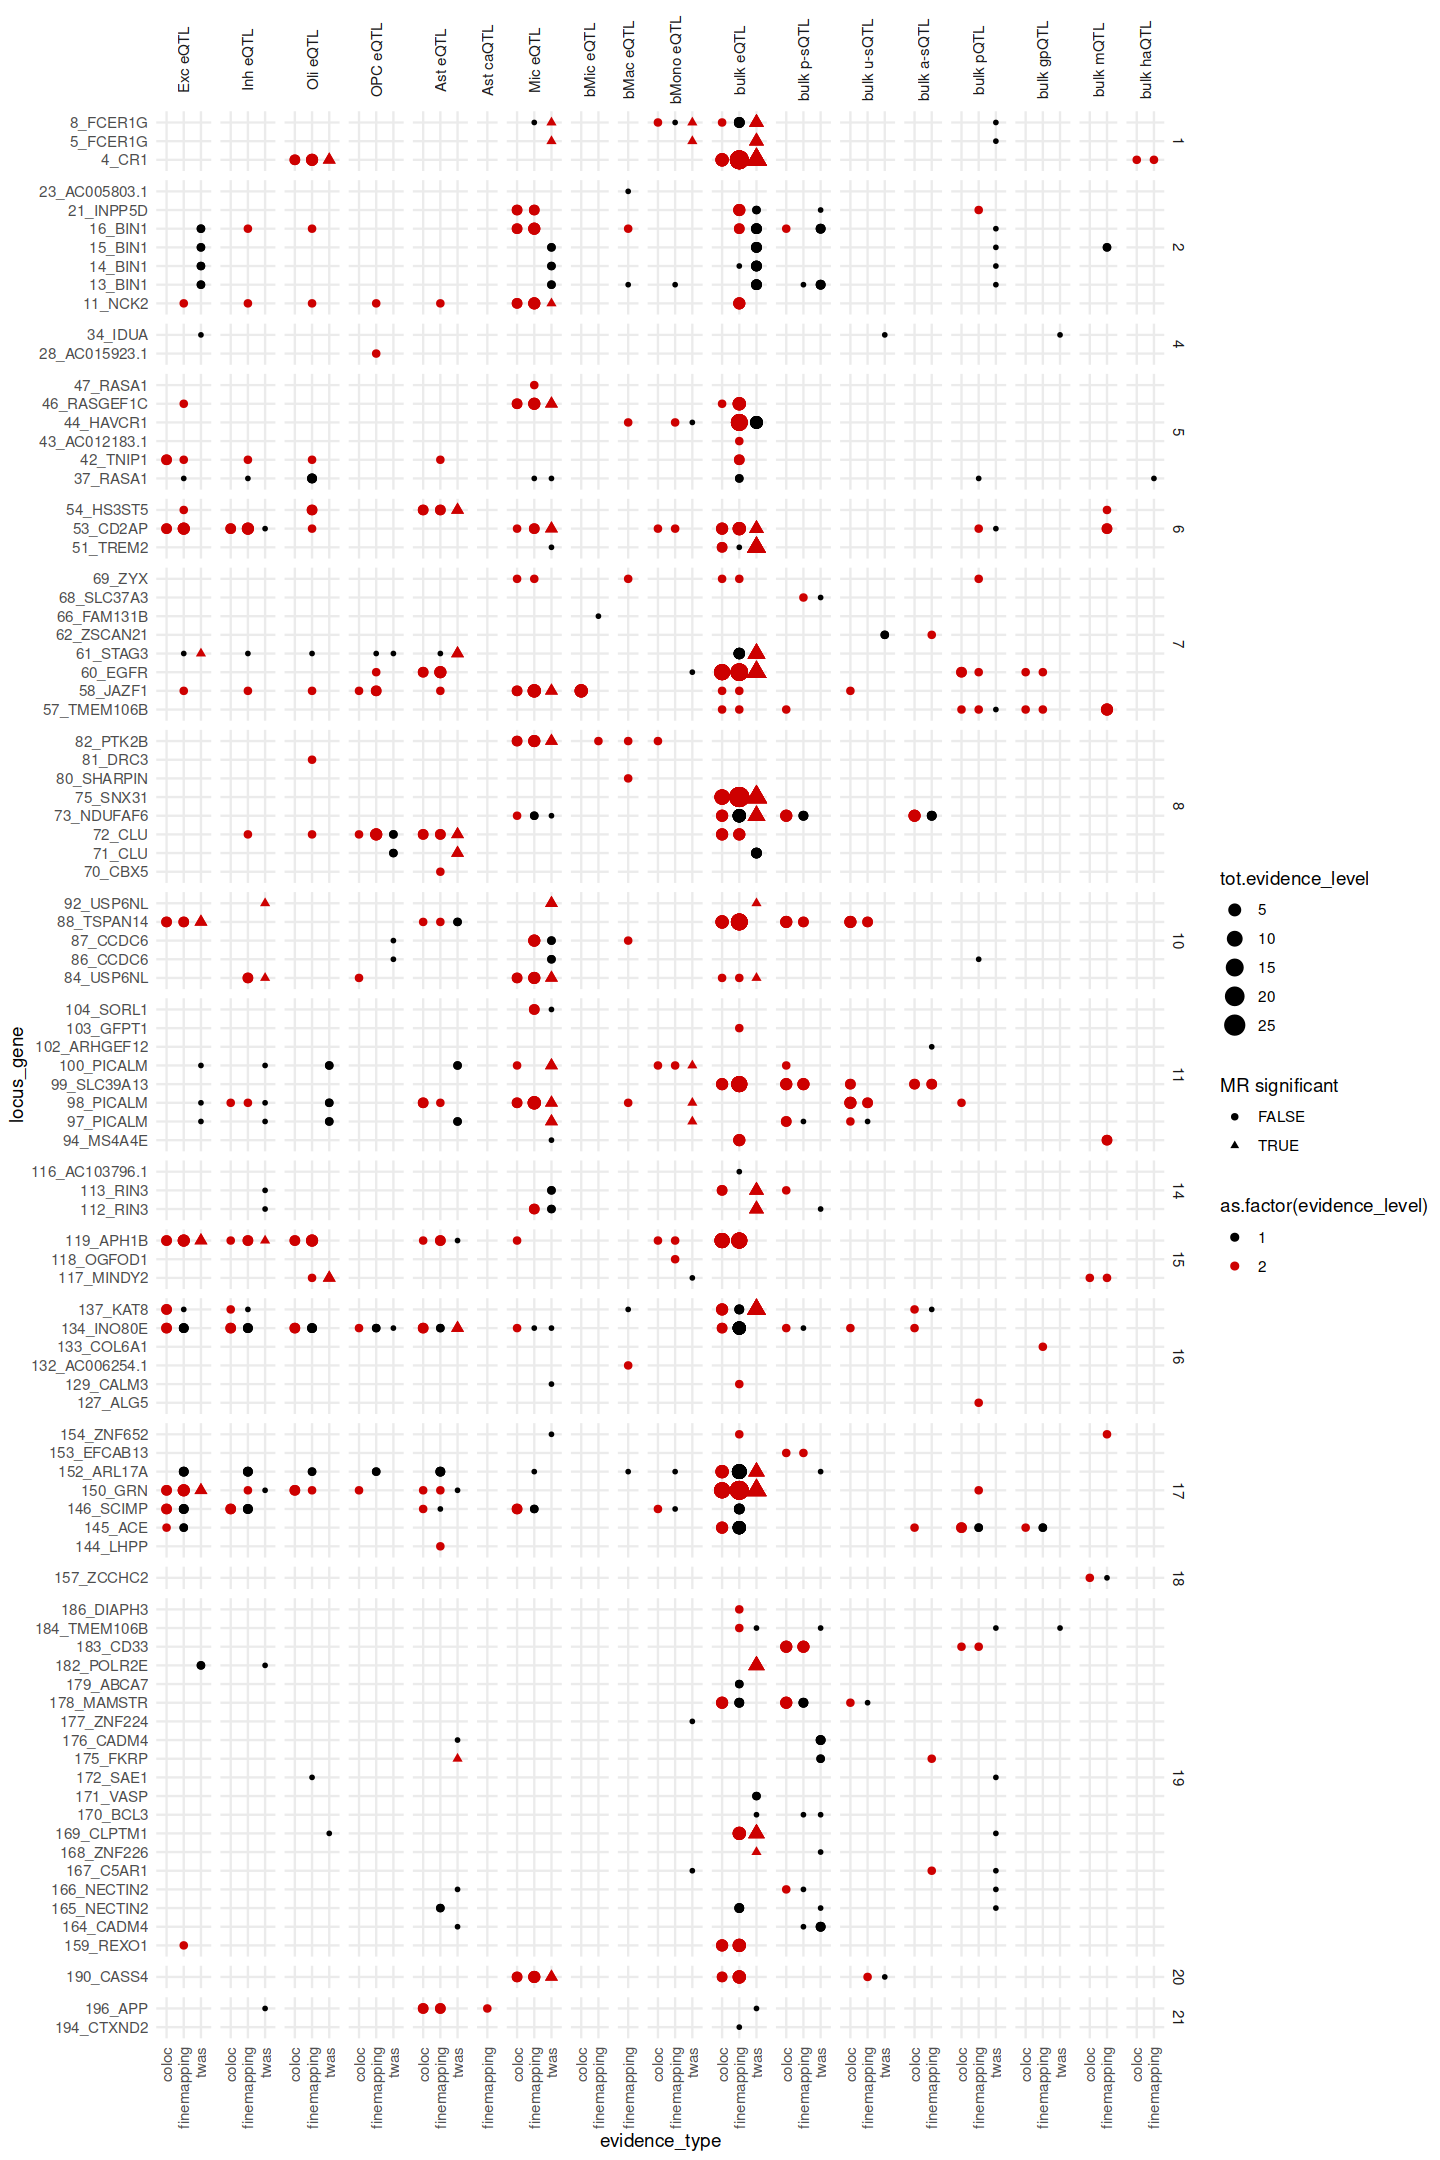

In [15]:
library(ggplot2)
p1 <- ggplot(res_adxlocfge)+geom_point(aes(y=locus_gene,x=evidence_type,
                                        size=tot.evidence_level,
                                        col=as.factor(evidence_level),
                                        shape=evidence_level==2&evidence_type=='twas'))+
  facet_grid(chr~context_short,scales = 'free',space = 'free')+scale_size(range = c(1,5))+theme_minimal()+
  scale_x_discrete(guide = guide_axis(angle = 90))+
  theme(strip.text.x = element_text(angle = 90))+
  scale_color_manual(values = c('black','red3'))+
  labs(shape='MR significant')

options(repr.plot.width = 12, repr.plot.height = 18)
p1

#### Plot with colors by context

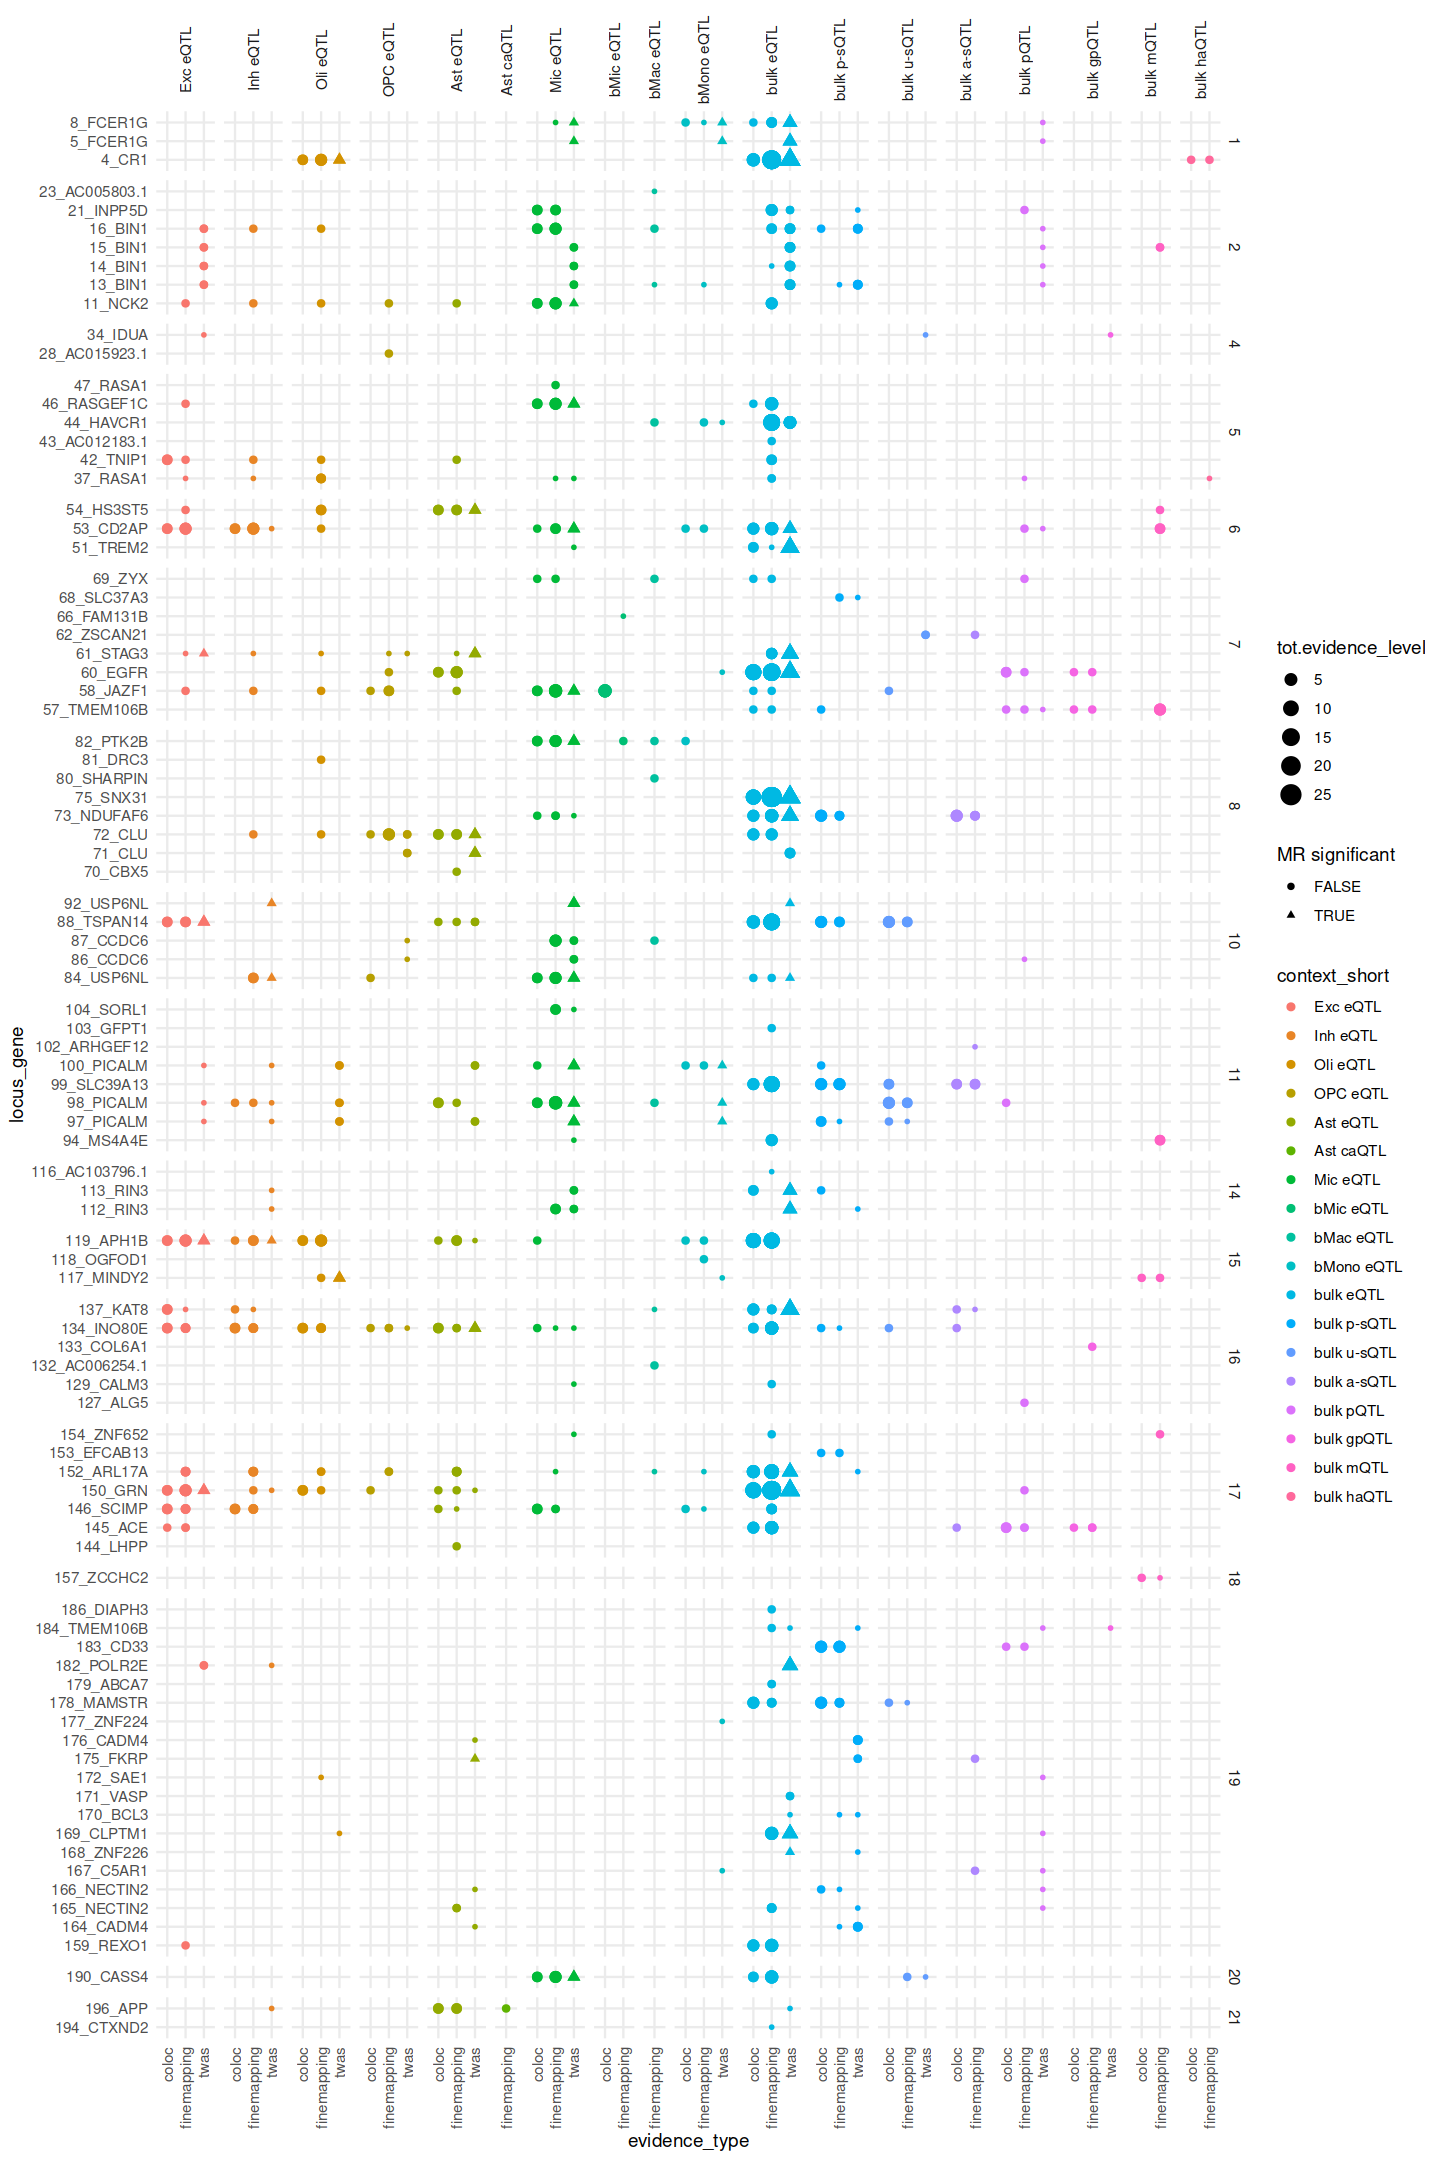

In [16]:
p2 <-ggplot(res_adxlocfge[evidence_level!=0][n.study.gene>0])+geom_point(aes(y=locus_gene,x=evidence_type,
                                                                          size=tot.evidence_level,
                                                                          col=context_short,
                                                                          shape=evidence_level==2&evidence_type=='twas'))+
  facet_grid(chr~context_short,scales = 'free',space = 'free')+scale_size(range = c(1,5))+theme_minimal()+
  scale_x_discrete(guide = guide_axis(angle = 90))+
  theme(strip.text.x = element_text(angle = 90))+
  labs(shape='MR significant')

options(repr.plot.width = 12, repr.plot.height = 18)
p2

#### Version by gene

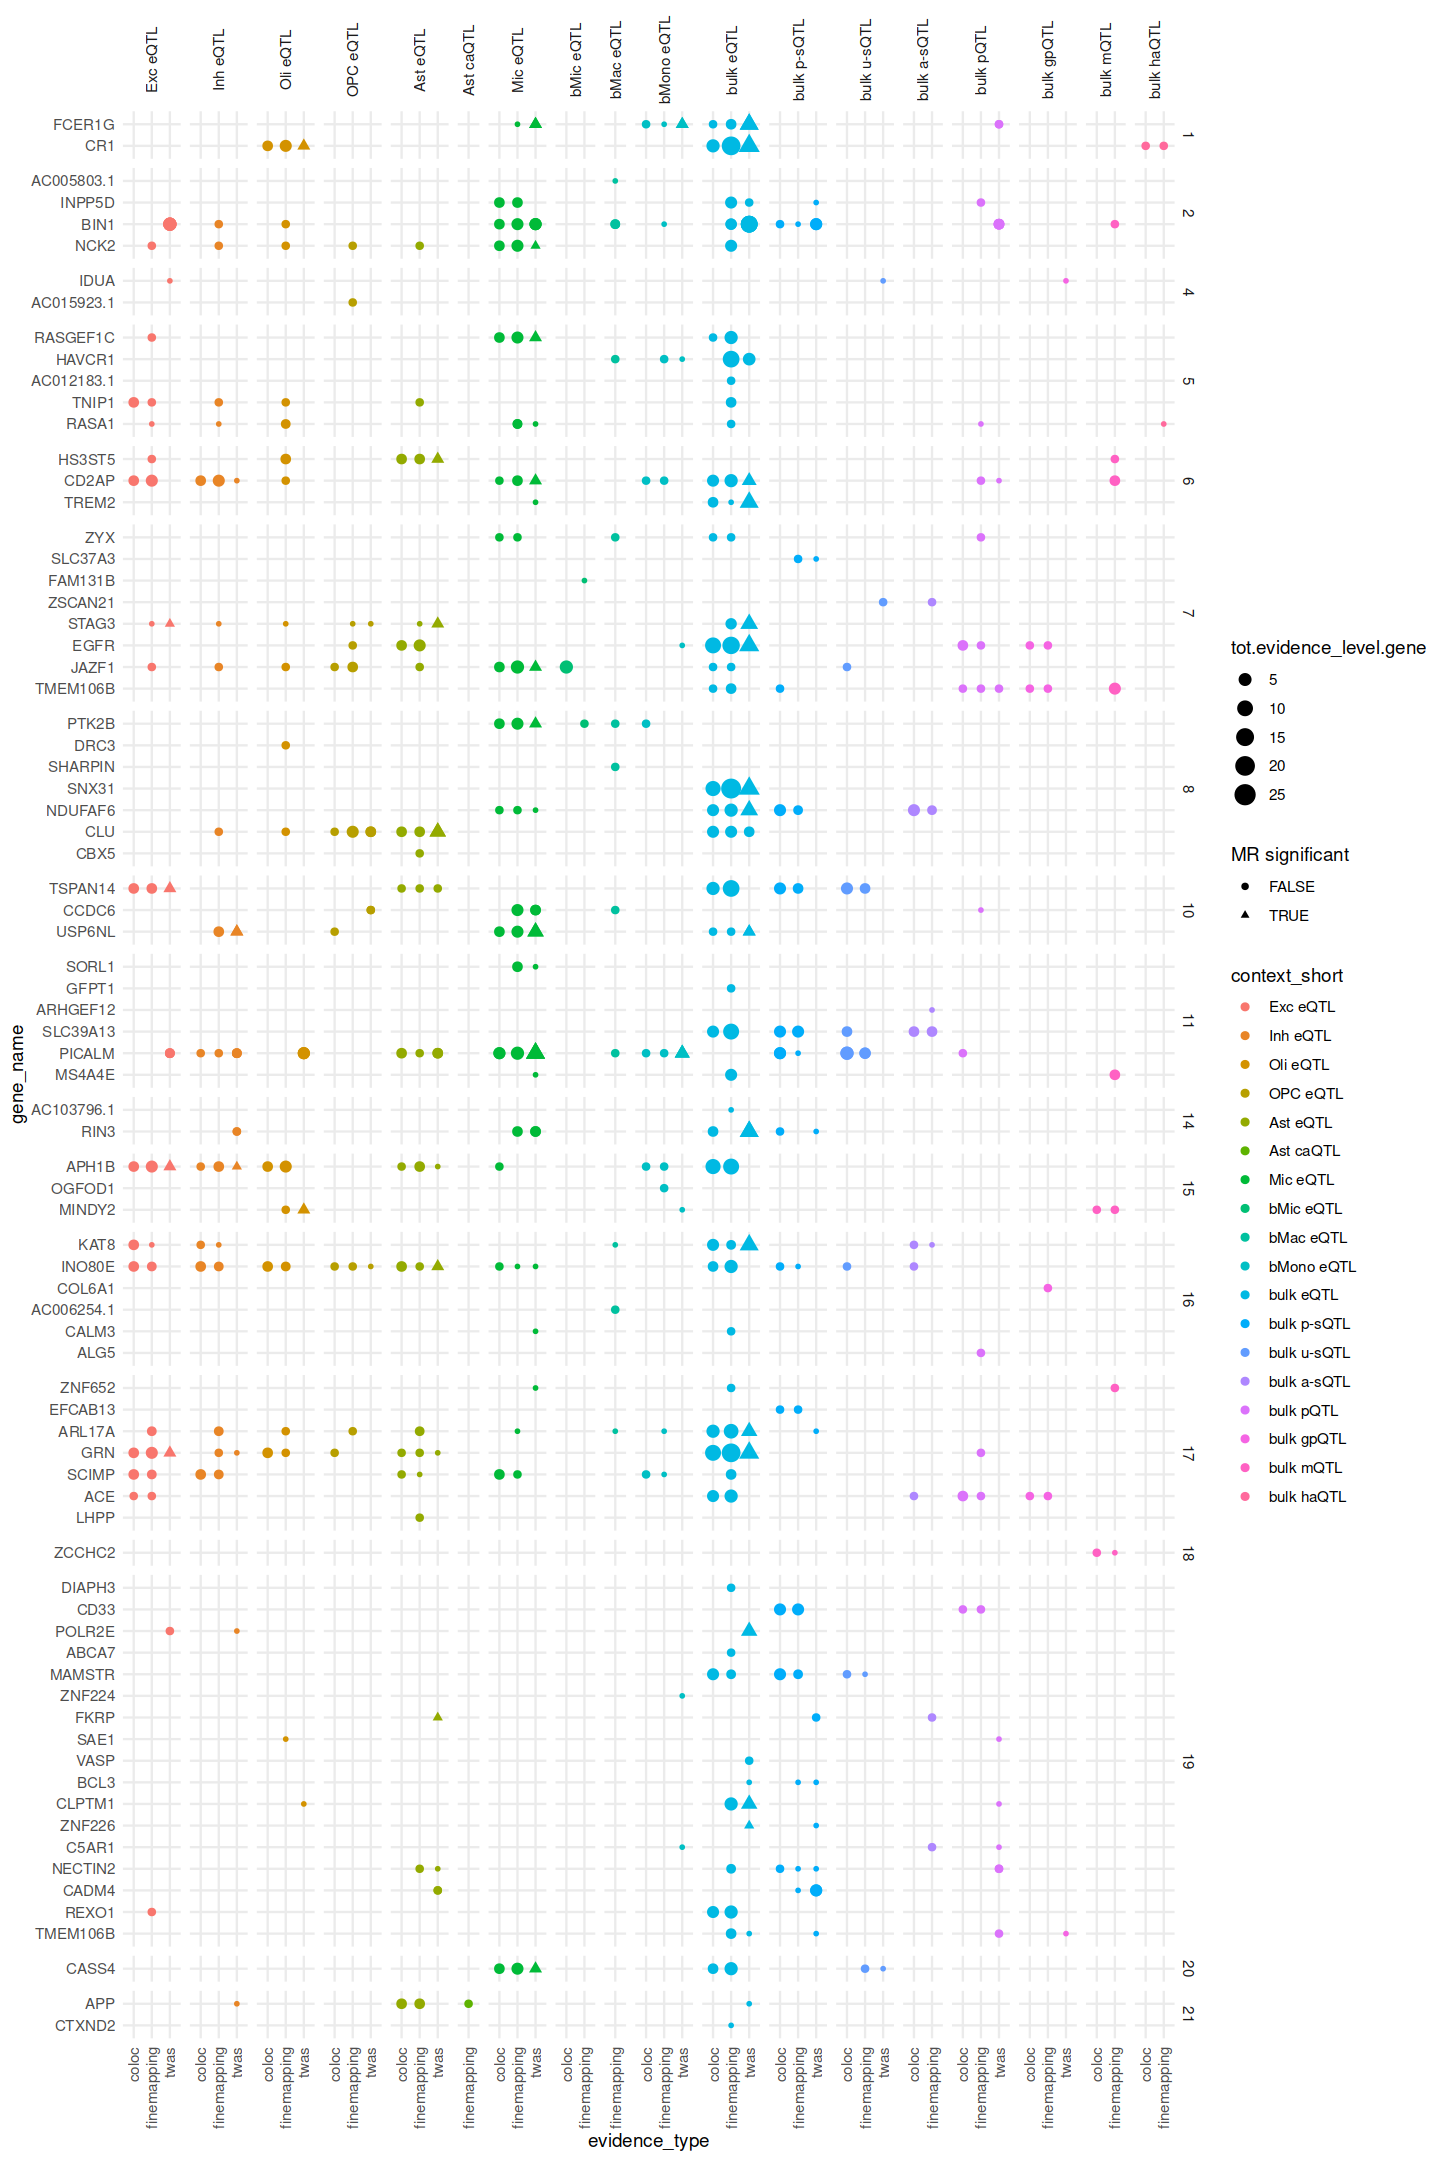

In [17]:
res_adxlocfge[,tot.evidence_level.gene:=sum(evidence_level),by=.(gene_name,evidence_type,context_short)]

res_adxlocfge[,gene_name:=factor(gene_name,levels =unique(gene_name[order(locus_index,confidence_lvl,-n.study.gene)]))]

p3 <- ggplot(unique(res_adxlocfge[evidence_level!=0][n.study.gene>0],by=c('gene_name','locus_index','evidence_type','context_short')))+
  geom_point(aes(y=gene_name,x=evidence_type,
                 size=tot.evidence_level.gene,
                 col=context_short,
                 shape=evidence_level==2&evidence_type=='twas'))+
  facet_grid(chr~context_short,scales = 'free',space = 'free')+scale_size(range = c(1,5))+theme_minimal()+
  scale_x_discrete(guide = guide_axis(angle = 90))+
  theme(strip.text.x = element_text(angle = 90))+
  labs(shape='MR significant')

options(repr.plot.width = 12, repr.plot.height = 18)
p3

#### Version grouping some contexts

In [18]:
res_adxlocfge[,context_group:=ifelse(context_short%in%c('bMono eQTL','bMac eQTL','bMic eQTL'),'Immune eQTL',
                                     ifelse(context_short%in%c( 'bulk p-sQTL','bulk u-sQTL','bulk a-sQTL'),'bulk sQTL',
                                     ifelse(context_short%in%c('bulk pQTL','bulk gpQTL'),'bulk (g)pQTL',
                                            ifelse(context_short%in%c('bulk haQTL','bulk mQTL'),'bulk epiQTL',as.character(context_short)))))]
contexts_order<-c('Exc eQTL','Inh eQTL','Oli eQTL','OPC eQTL','Ast eQTL','Ast caQTL','Mic eQTL',
                  'Immune eQTL',
                  'bulk eQTL',
                  'bulk sQTL',
                  'bulk (g)pQTL',
                  'bulk epiQTL')

res_adxlocfge[,context_group:=factor(context_group,levels = contexts_order)]
res_adxlocfge[,tot.evidence_level.gene.contextgroup:=sum(evidence_level),by=.(gene_name,evidence_type,context_group)]

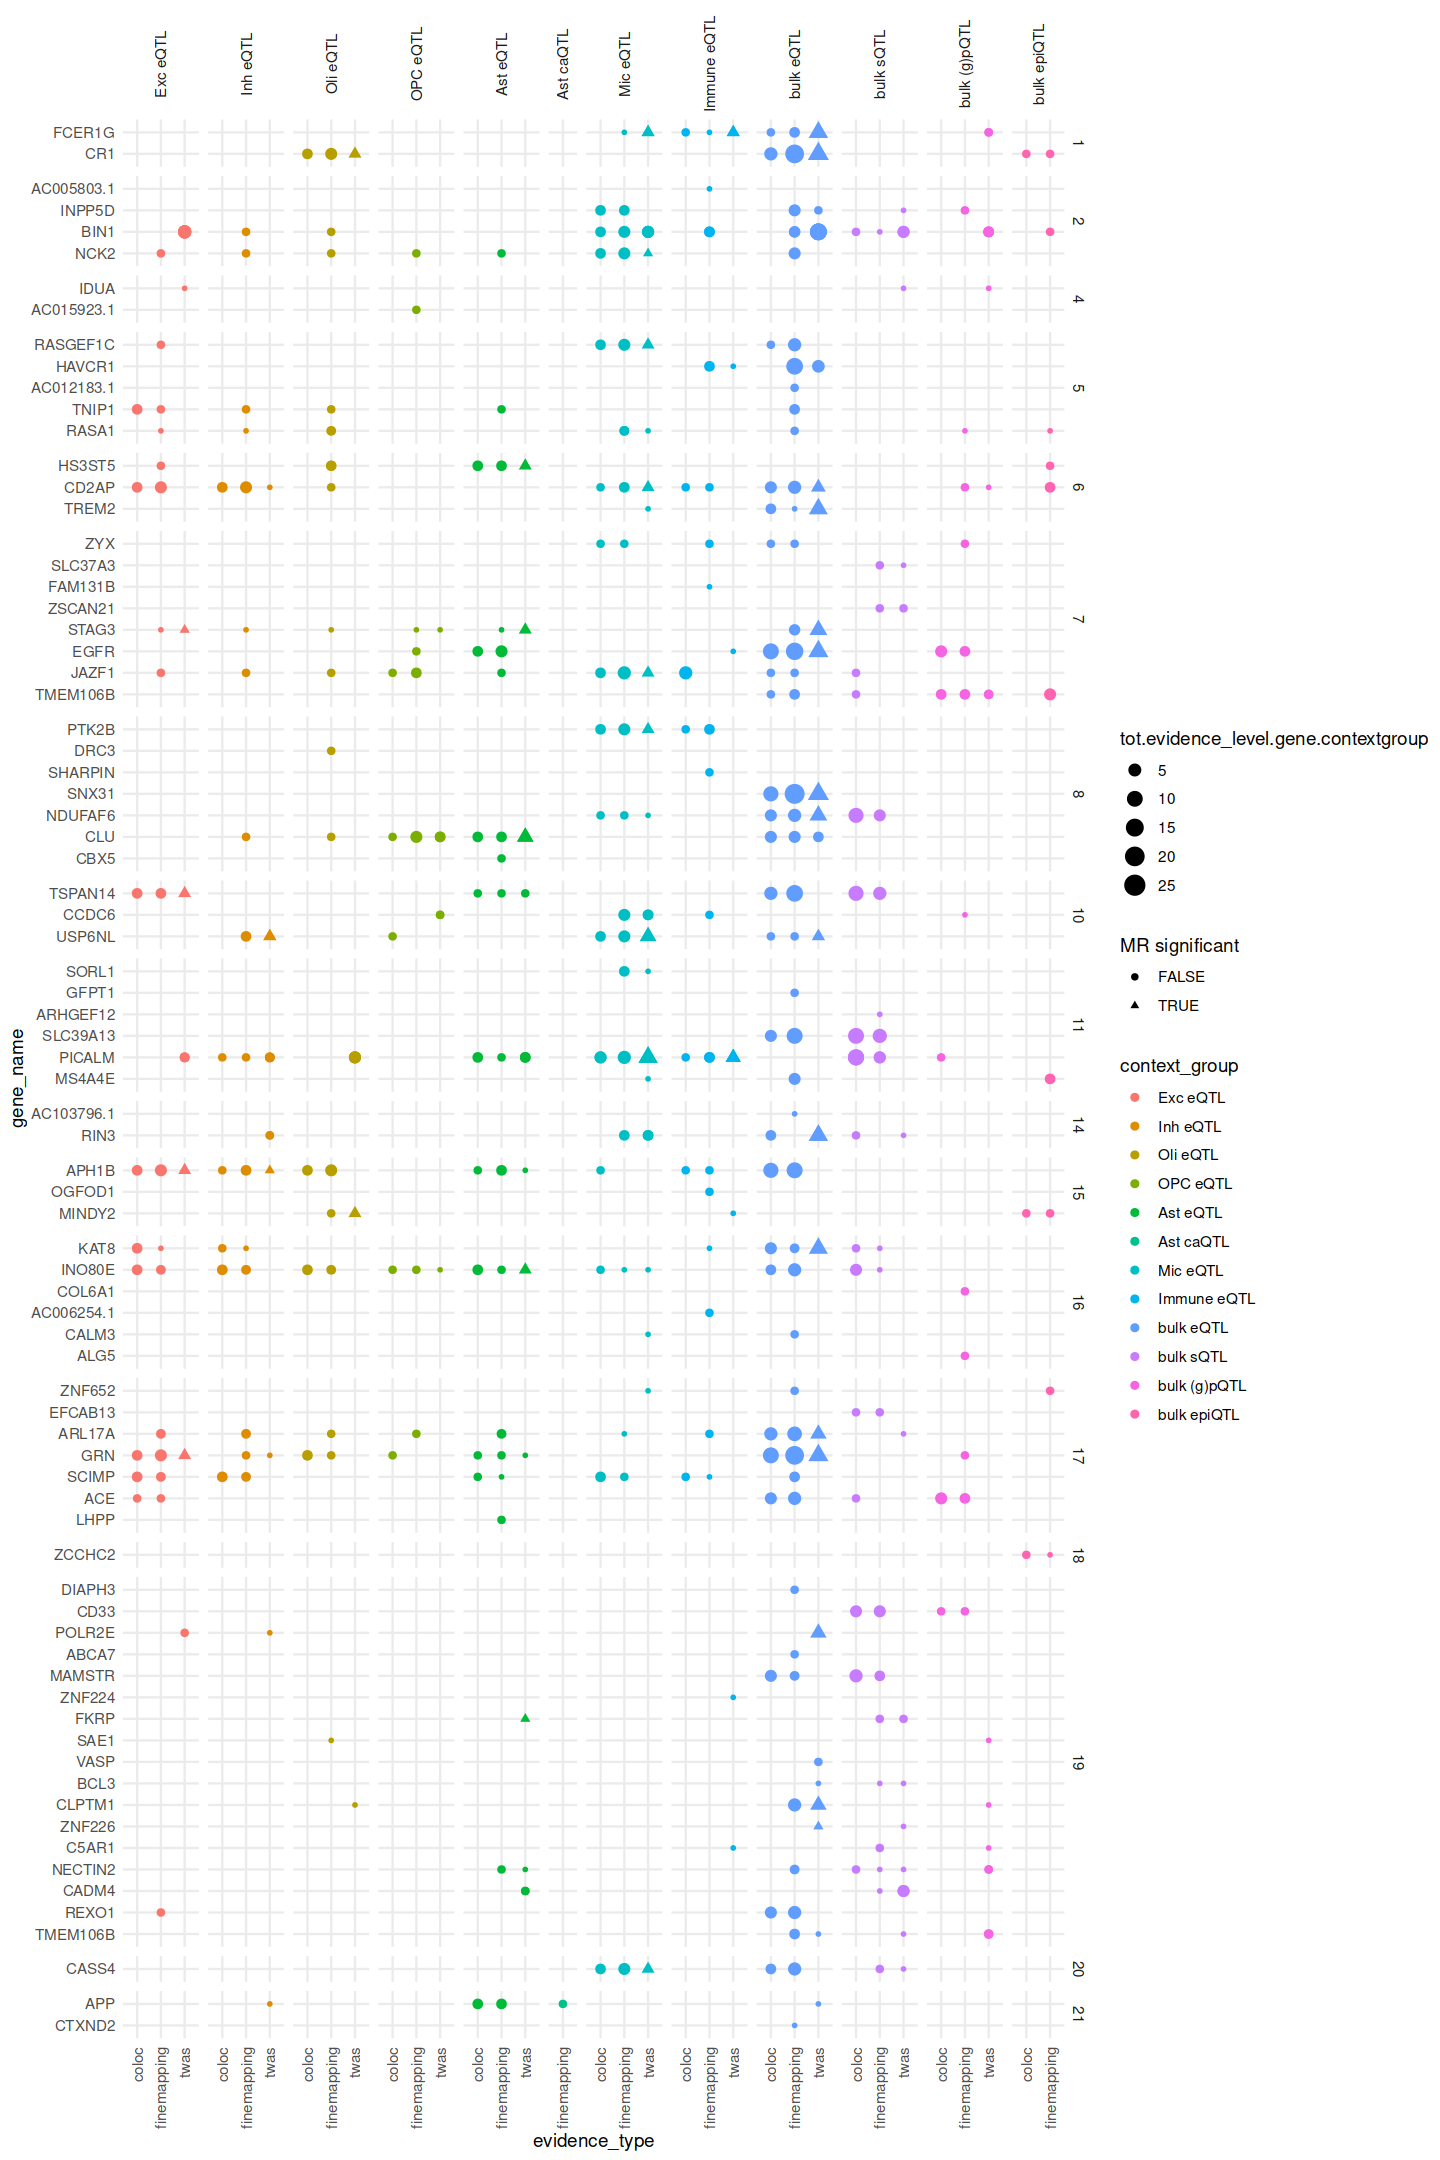

In [19]:
p4 <-ggplot(unique(res_adxlocfge[evidence_level!=0][n.study.gene>0],by=c('gene_name','locus_index','evidence_type','context_group')))+
  geom_point(aes(y=gene_name,x=evidence_type,
                 size=tot.evidence_level.gene.contextgroup,
                 col=context_group,
                 shape=evidence_level==2&evidence_type=='twas'))+
  facet_grid(chr~context_group,scales = 'free',space = 'free')+scale_size(range = c(1,5))+theme_minimal()+
  scale_x_discrete(guide = guide_axis(angle = 90))+
  theme(strip.text.x = element_text(angle = 90))+
  labs(shape='MR significant')

options(repr.plot.width = 12, repr.plot.height = 18)
p4

#### Subset gene to top 2 tiers: with C1/2/3/4 confidence


C1 C2 C3 C4 C5 C6 
13  5 23 11  8 18 

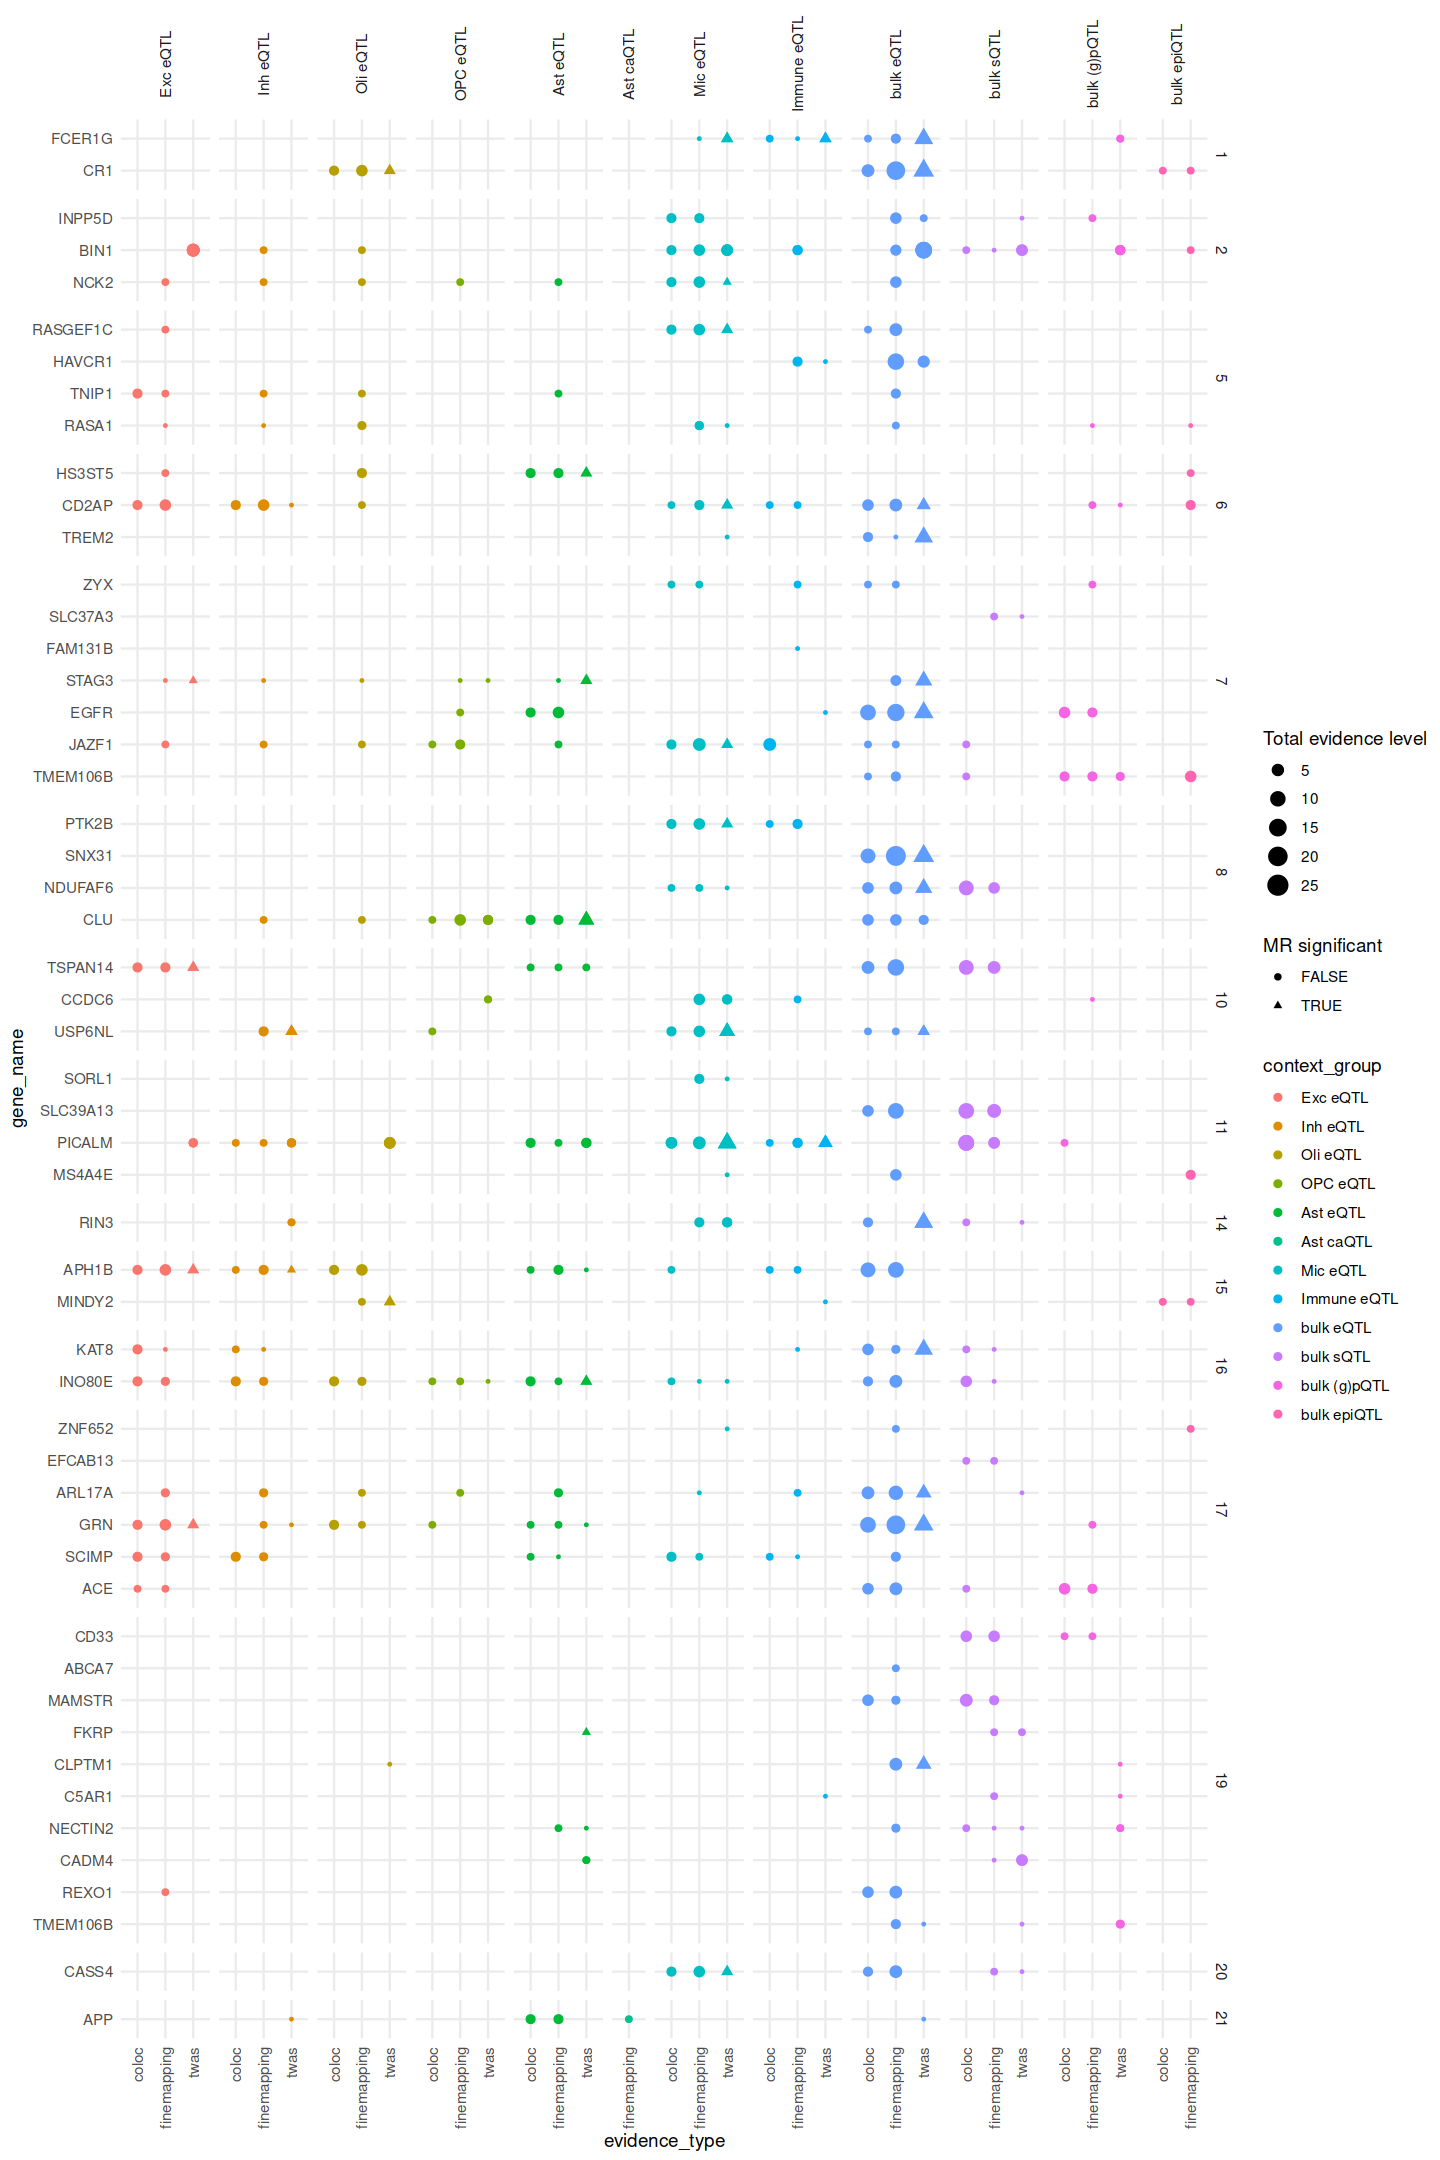

In [20]:

unique(res_adxlocfge[order(confidence_lvl)],by='gene_name')$confidence_lvl|>table()

res_adxlocfge_cont_top<-unique(res_adxlocfge[evidence_level!=0][n.study.gene>0],by=c('gene_name','locus_index','evidence_type','context_group'))[gene_name%in%gene_name[top_confidence%in%c('C1','C2','C3','C4')]]


p5 <- ggplot(res_adxlocfge_cont_top)+
  geom_point(aes(y=gene_name,x=evidence_type,
                 size=tot.evidence_level.gene.contextgroup,
                 col=context_group,
                 shape=evidence_level==2&evidence_type=='twas'))+
  facet_grid(chr~context_group,scales = 'free',space = 'free')+scale_size(range = c(0.75,5))+theme_minimal()+
  scale_x_discrete(guide = guide_axis(angle = 90))+
  theme(strip.text.x = element_text(angle = 90))+
  labs(shape='MR significant',size='Total evidence level')

options(repr.plot.width = 12, repr.plot.height = 18)
p5